# DECAMsim

DECAMsin is package for simulating the catalog of the stars observed by DECam (installed camera on the Blanco 4m telescope).

### besoncon
This class provides a catalog of stars for a given area of the sky. The catalog in the format of pandas.DataFrame includes the type and magnitude (between 14 and 20) in g band. The following example shows creating a 'besancon' object. By calling 'sim_stars_type' method, a data frame of simulated stars is created. As you can see in the following, the generated catalog by 'besancon' object does not include the position in the sky and magnitudes in other band. Actually we do not need to use 'besancon' object directly and it is used by another class 'CatalogSimulator'. The star sample generated from a density model (besancon model from Robin et al 2012) for a point RA = 180 and Dec = -60 where has significant distance from Galactic disk so the density of the stars is low.

In [1]:
from DECAMsim import besancon
besancon_object = besancon.besancon()
_df = besancon_object.sim_stars_type(area = 1, random_seed = 1)
print('number of created stars:', len(_df))
_df.head()

number of created stars: 910


,mag,type
0,14.290144,G0
1,14.613871,G0
2,14.324139,G0
3,14.457360,G0
4,14.444117,G0


### CatalogSimulator
The objects from 'CatalogSimulator' class generates given number of catalogs around a center and within a radius. After creating a 'CatalogSimulator' object, by calling 'set_param' method mentioned parameters (number of catalogs: catalog_number, radius: radius, center: ra0 and dec0) are determined. After setting the parameters, the catalog of the stars is created by calling 'make_stars' method and saved in the 'catalog' attribute as a pandas.DataFrame:

In [2]:
from DECAMsim.catalogsimulator import CatalogSimulator 
cat_sim = CatalogSimulator()
cat_sim.set_param(radius = 1, catalog_number = 10, ra0 = -20, dec0 = 10)
cat_sim.make_stars(random_seed = 1000)
cat_sim.catalog.head()


,mag,type,catalog_number,RA,Dec
0,14.372321,G0,0,-19.181829,9.934877
1,14.073795,G0,0,-20.283451,9.807545
2,14.782701,G0,0,-20.823806,10.541466
3,14.394046,G0,0,-19.511049,9.500030
4,14.869590,G0,0,-19.248611,10.570856


Lets have a look into the generated stars. Among 10 simulated star catalog (catalog_number = 0-10), we explore the fifth one. The following plot illustrates the spatial distribution of the simulated stars:

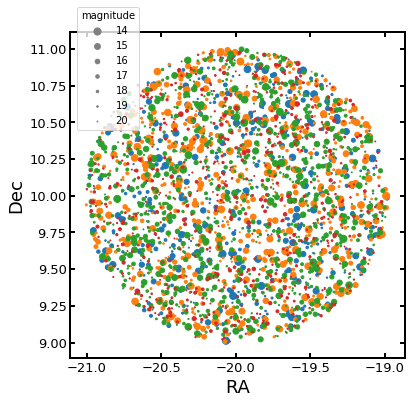

In [3]:
import matplotlib.pyplot as plt
import numpy as np

_catalog = cat_sim.catalog[cat_sim.catalog['catalog_number'] == 4]
types = ['F', 'G', 'K', 'M']
color = ['b', 'g', 'y', 'r']
h_types = []
fig, ax1 = plt.subplots(figsize=(6, 6))

ax1.set_xlabel('RA', fontsize=18)
ax1.set_ylabel('Dec', fontsize=18)

for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
ax1.tick_params(axis='y', direction='in', labelsize = 13, right = True, width = 2, length = 5)
ax1.tick_params(axis='x', direction='in', labelsize = 13, top = True, width = 2, length = 5)

for i, _type in enumerate(types):
    _f = [t[0] == _type for t in _catalog.type]
    ax1.scatter(_catalog.loc[_f, 'RA'], 
                _catalog.loc[_f, 'Dec'], 
                s = ((22-_catalog.loc[_f, 'mag'])**3)/10)


_mags = np.arange(14,21,1)
h_mags = [ax1.scatter([], [], s = ((22-m)**3)/10, c = 'grey') for m in _mags]
ax1.legend(h_mags, _mags, loc=(0.02,0.7), title="magnitude")

plt.show()

In above figure blue, green, yellow and red dot respectively represent 'F', 'G', 'K' and 'M' type stars. 
The size of dots also shows the luminosity of the stars.

The 'mag' is CFHT g band magnitude and is the reference magnitude from besancon model. 
The other magnitudes are computed by calling 'compute_magnitudes'. 
It uses the Pickles stellar SED template and computes the magnitudes in CFHT bands ('up', 'gp', 'rp', 'ip', 'zp'), 
DES bands ('des_u', 'des_g', 'des_r', 'des_i', 'des_z') and Gaia bands ('gaia_G', 'gaia_BP', 'gaia_RP', 'gaia_RVS'):



In [4]:
cat_sim.compute_magnitudes()
cat_sim.catalog.head()

,mag,type,catalog_number,RA,Dec,des_u,des_g,des_r,des_i,des_z,gaia_G,gaia_BP,gaia_RP,gaia_RVS,up,rp,ip,zp,gp,delta_mag
0,14.372321,G0,0,-19.181829,9.934877,15.693221,14.437921,14.008621,13.885021,13.871821,14.179621,14.386721,13.908821,13.888321,15.336821,14.029721,13.890721,13.872221,14.372321,14.089821
1,14.073795,G0,0,-20.283451,9.807545,15.394695,14.139395,13.710095,13.586495,13.573295,13.881095,14.088195,13.610295,13.589795,15.038295,13.731195,13.592195,13.573695,14.073795,13.791295
2,14.782701,G0,0,-20.823806,10.541466,16.103601,14.848301,14.419001,14.295401,14.282201,14.590001,14.797101,14.319201,14.298701,15.747201,14.440101,14.301101,14.282601,14.782701,14.500201
3,14.394046,G0,0,-19.511049,9.500030,15.714946,14.459646,14.030346,13.906746,13.893546,14.201346,14.408446,13.930546,13.910046,15.358546,14.051446,13.912446,13.893946,14.394046,14.111546
4,14.869590,G0,0,-19.248611,10.570856,16.190490,14.935190,14.505890,14.382290,14.369090,14.676890,14.883990,14.406090,14.385590,15.834090,14.526990,14.387990,14.369490,14.869590,14.587090


### DECamCCD
A DECamCCD object represent a single CCD in an observations. It is initialized by passing an ID and [WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html) parameters:

Parameters:

ID : string or int or float
An ID for naming the CCD
        
naxis1 : int
Size of the X side of CCD in pixel
        
naxis2 : int
size of the Y side of CCD in pixel
            
ctype : a list of string with the size of 2.
the coordinate types in list for example: ['RA---TAN', ,'DEC--TAN'] 

crval : list of float
[RA of reference pixel (deg), Dec of reference pixel (deg)]
            
crpix : list of float
[X of reference pixel, Y of reference pixel]
            
cd : A 2D list or array of floats with the shape of (2, 2)
[ [RA deg per column pixel, RA deg per row pixel], [Dec deg per column pixel, Dec deg per row pixel] ]
In othaer words:
[[CD1_1, CD1_2], [CD2_1, CD2_2]]

### DECam
DECam is a class for simulating a catalog of stars observed by DECam. It actually includes a list of DECamCCD objects. But, practically, we do not need to create DECamCCD objects because they are created by DECam objects internally. A DECam object can be constructed by passing a lists of IDs and list of [WCS](http://docs.astropy.org/en/stable/api/astropy.wcs.WCS.html) parameters: 

DECam(ID, naxis1, naxis2, ctype, crval, crpix, cd)

But if they are not passed, the object is constructed by a set of WCS parameters provided for 62 CCDs in DECam from 'CCDs/wcs_62ccd.csv' file and construct a DECam CCD configuration at RA = 15.99 and Dec = -49.3.

After constructing a DECam object, a catalog of the star is ingested into the object using 'DECam.set_catalog' method. The CCDs in the DECam object can be divided into smaller chunks using 'DECam.divide2chunks' method and if any catalog has been already ingested into the object, the stars are automatically assigned to associated chunk by a 'chunk_ID' column in the catalog.

In [5]:
from DECAMsim.decamsim import DECam
decam = DECam()

The decam object consists of a list 62 DECamCCD objects and those objects include WCS information of each CCD:

In [6]:
print('number of CCDs:', len(decam.CCDs))
print('ID and WCS parameters of the 10th CCD')
print("ID =", decam.CCDs[10].ID)
print("naxis1 =", decam.CCDs[10].naxis1)
print("naxis2 =", decam.CCDs[10].naxis2)
print("crpix =", decam.CCDs[10].w.wcs.crpix)
print("crval =", decam.CCDs[10].w.wcs.crval)
print("ctype =", decam.CCDs[10].w.wcs.ctype)
print("cd =", decam.CCDs[10].w.wcs.cd)

number of CCDs: 62
ID and WCS parameters of the 10th CCD
ID = 11
naxis1 = 2048
naxis2 = 4096
crpix = [ 8914. -2210.]
crval = [ 15.99 -49.3 ]
ctype = ['RA---TAN', 'DEC--TAN']
cd = [[-6.990e-08  7.287e-05]
 [-7.290e-05 -6.440e-08]]


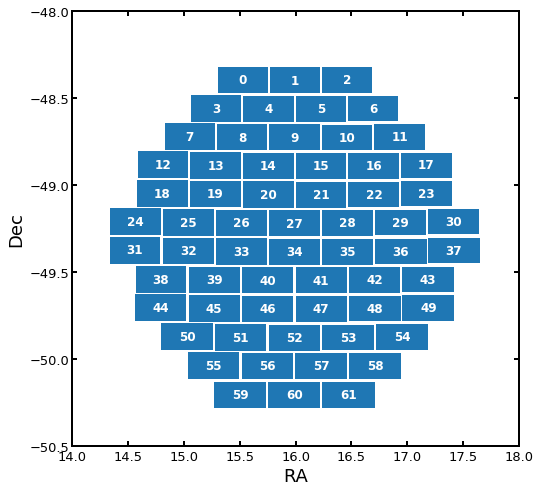

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import numpy as np
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('RA', fontsize=18)
ax.set_ylabel('Dec', fontsize=18)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='y', direction='in', labelsize = 13, right = True, width = 2, length = 5)
ax.tick_params(axis='x', direction='in', labelsize = 13, top = True, width = 2, length = 5)
rectangles = {}
for i, ccd in enumerate(decam.CCDs):
    _ra, _dec = ccd.w.wcs_pix2world([0, ccd.naxis1], [0, ccd.naxis2], 1) 
    rectangles[str(i)] = mpatch.Rectangle((_ra[0], _dec[0]), _ra[1] - _ra[0], _dec[1] - _dec[0] , fill = True)
for r in rectangles:
    ax.add_artist(rectangles[r])
    rx, ry = rectangles[r].get_xy()
    cx = rx + rectangles[r].get_width()/2.0
    cy = ry + rectangles[r].get_height()/2.0

    ax.annotate(r, (cx, cy), color='w', weight='bold', 
                fontsize=12, ha='center', va='center')
ax.set_xlim((14, 18))
ax.set_ylim((-50.5, -48))
plt.show()

We can also divide each CCD (in other word, the DECamCCD.catalog data frame) into smaller chunks using divide2chunks(dx1, dx2) method where dx1 and dx2 are the size chunks in pixel units. For example:

In [8]:
decam.divide2chunks(dx1 = 512, dx2 = 512)
decam.CCDs[10].chunks.head()

,x1_min,x2_min,x1_max,x2_max,chunk_ID
0,0.5,0.5,512.5,512.5,0
1,0.5,512.5,512.5,1024.5,1
2,0.5,1024.5,512.5,1536.5,2
3,0.5,1536.5,512.5,2048.5,3
4,0.5,2048.5,512.5,2560.5,4


Let's have a look into the chunks configuration:

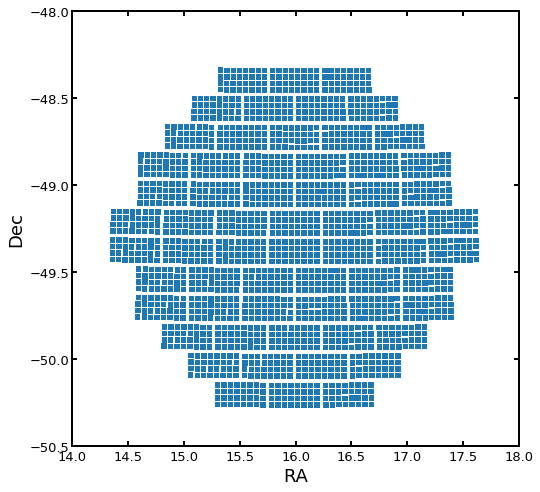

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
import numpy as np
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('RA', fontsize=18)
ax.set_ylabel('Dec', fontsize=18)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.tick_params(axis='y', direction='in', labelsize = 13, right = True, width = 2, length = 5)
ax.tick_params(axis='x', direction='in', labelsize = 13, top = True, width = 2, length = 5)
rectangles = []
for i, ccd in enumerate(decam.CCDs):
    for index, row in ccd.chunks.iterrows():
        _ra, _dec = ccd.w.wcs_pix2world([row['x1_min']+40, row['x1_max']-40], [row['x2_min']+40, row['x2_max']-40], 1) 
        rectangles.append(mpatch.Rectangle((_ra[0], _dec[0]), _ra[1] - _ra[0], _dec[1] - _dec[0] , fill = True))
for r in rectangles:
    ax.add_artist(r)

ax.set_xlim((14, 18))
ax.set_ylim((-50.5, -48))
plt.show()

### example problem:
A camera may have a systematics offset in the procedure of flux measurement. The offset  varies according to the location of an object on the CCDs. If there is a reference magnitude from other instrumnet without any systematics, one can measure the offset as the difference between the magniutdes from the CCD and reference magnitudes (M_ccd - M_ref) for each chunk on the camera. So the offset is the mean of M_ccd - M_ref and error in offset measurement is the standard error of M_ccd - M_ref. For simplisity, we assume that M_ref has zero error. The accuracy in measuring the offset depends on the dispersion error of our photomery (error in M_ccd). In other word, higher accuracy in offset measurement needs more accurate photometry. Another approach for achieving more precise measurement of the offset is increaing the number of data points. In this approach we stacked data from several observations to increase the number of M_ccd-M_ref values within each chunk. We assume that the dispersion error of an observation linearly varies from 0.005 to 0.02 respectively for the magnitude of 14 to 20. What is the accuracy of offset measurement for a chunk with a size of 256x256 pixels using 100 stacked catalogs od stars?

**Solution:** We solve this problem in four steps: 

1) generating a stacked catalog 100 observations 

2) inducing dispersion error into the magnitudes to created noisy data (similar to real data) 

3) creating a DECam object and ingesting the catalog 

4) computing the standard error of the M_ccd-M_ref within each chunk.

**Solution details:**

1) Now we generate 100 star catalog at the position of the default (RA = -15.99, Dec = -49.33) with default radius (radius = 1.1 deg):

In [10]:
cat_sim = CatalogSimulator()
cat_sim.set_param(catalog_number = 100)
cat_sim.make_stars(random_seed = 1)


2) As mentioned before, the reference magnitude in the generated catalog is CFHT g band. We can generate other bands using compute_magnitudes() method but it is not necessary for our example problem. Depend on the observational conditions the magnitudes have dispersion error. We also assign error to each star by a linear model: 0.005 for mag = 14 and 0.02 for mag = 20 and interpolation for magnitudes between 14 and 20. Then random values generated from a Gaussian distribution with dispersion of the error are added to the magnitude to simulate realistic noisy magnitude 'g':

In [11]:
from scipy.interpolate import interp1d
from numpy.random import normal
mag_err_model = interp1d(x = [14, 20], y = [0.005,0.02])
cat_sim.catalog['mag_err'] = mag_err_model(cat_sim.catalog['mag'])
cat_sim.catalog['g'] = normal(loc = cat_sim.catalog['mag'],
                              scale = cat_sim.catalog['mag_err'])

3) A DECam object is created by default value and with 256x256 pixels chunks.

In [12]:
from numpy.random import uniform
from DECAMsim.decamsim import DECam
import time
decam = DECam()
decam.divide2chunks(dx1 = 256, dx2 = 256)
t = time.time()
decam.set_catalog(catalog = cat_sim.catalog, ra_column = 'RA', dec_column = 'Dec', margin = 0)
print("It took",time.time() - t, "seconds for creating a DECam object, ingesting the stars \
catalog and dividing them into the chunks")
decam.CCDs[10].catalog.head()


It took 5.265425205230713 seconds for creating a DECam object, ingesting the stars catalog and dividing them into the chunks


,mag,type,catalog_number,RA,Dec,mag_err,g,x1,x2,chunk_ID
53,14.507922,G4,0,16.275792,-48.794982,0.006270,14.498018,1988.849350,367.061623,113
210,14.921868,K3,0,16.387428,-48.689811,0.007305,14.920320,549.670867,1382.526019,37
375,15.539649,F5,0,16.257310,-48.687527,0.008849,15.537649,514.242276,203.772490,32
515,15.320986,K2,0,16.652237,-48.687365,0.008302,15.318656,530.655120,3781.888340,46
618,16.370306,G2,0,16.457635,-48.676076,0.010926,16.370747,364.281301,2019.561930,23


4) Now, we measure the standard error of g band magnitude deviation from reference magnitude within each chunk.

In [13]:
import numpy as np
from scipy.stats import sem
means = []
STDs = []
nums = []
SEMs = [] #standard errors of means
for ccd in decam.CCDs:
    for index, row in ccd.chunks.iterrows():
        _vals = ccd.catalog[ccd.catalog['chunk_ID'] == row['chunk_ID'] ]['g']-\
                ccd.catalog[ccd.catalog['chunk_ID'] == row['chunk_ID'] ]['mag']
        nums.append(len(_vals))
        means.append(np.mean(_vals))
        STDs.append(np.std(_vals))
        SEMs.append(sem(_vals))

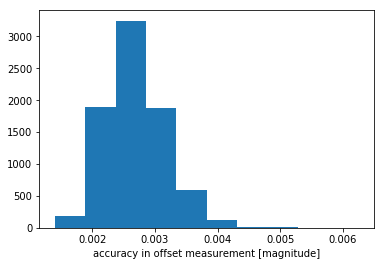

Mean of error in offset error for each chunk using 100 stacked catalog: 0.0026898637215998058


In [14]:
import matplotlib.pyplot as plt
plt.hist(SEMs)
plt.xlabel('accuracy in offset measurement [magnitude]')
plt.show()
print('Mean of error in offset error for each chunk using 100 stacked catalog:', np.mean(SEMs))

The above figure shows the distribution of the accuracy in offset measurement. We expect that on average the offset is more precisely measured for chunks with higher number of stars. The below figure show the same point.

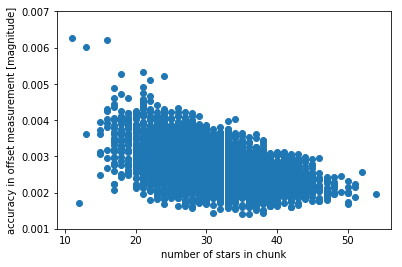

In [15]:
plt.scatter(nums, SEMs)
plt.ylim(0.001,  0.007)
plt.xlabel('number of stars in chunk')
plt.ylabel('accuracy in offset measurement [magnitude]')
plt.show()